In [1]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
import pandas_datareader as web

In [2]:
import yfinance as yfin
data=yfin.download('BTC-USD',start='2017-01-01',end="2022-01-26")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...
2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,43011992031
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1852 entries, 2016-12-31 to 2022-01-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1852 non-null   float64
 1   High       1852 non-null   float64
 2   Low        1852 non-null   float64
 3   Close      1852 non-null   float64
 4   Adj Close  1852 non-null   float64
 5   Volume     1852 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.3 KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1.852000e+03
mean,15834.997520,16264.549612,15357.593149,15851.851023,15851.851023,2.120995e+10
std,17153.324317,17614.851318,16611.731763,17151.646132,17151.646132,2.113125e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5598.799927,5794.320068,5463.752686,5619.032471,5619.032471,4.649225e+09
50%,8719.335938,8890.286621,8488.888184,8726.205078,8726.205078,1.676366e+10
75%,15356.113037,15892.159668,14423.402344,15461.442139,15461.442139,3.274962e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
data.columns
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999421,0.998857,0.998542,0.998542,0.660411
High,0.999421,1.000000,0.998798,0.999358,0.999358,0.664805
Low,0.998857,0.998798,1.000000,0.999246,0.999246,0.650727
Close,0.998542,0.999358,0.999246,1.000000,1.000000,0.658927
Adj Close,0.998542,0.999358,0.999246,1.000000,1.000000,0.658927
Volume,0.660411,0.664805,0.650727,0.658927,0.658927,1.000000


In [6]:
df = pd.DataFrame(data, columns=['Adj Close'])
df = df.reset_index()
df.head()
df.info()
df.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1852 non-null   datetime64[ns]
 1   Adj Close  1852 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.1 KB


False

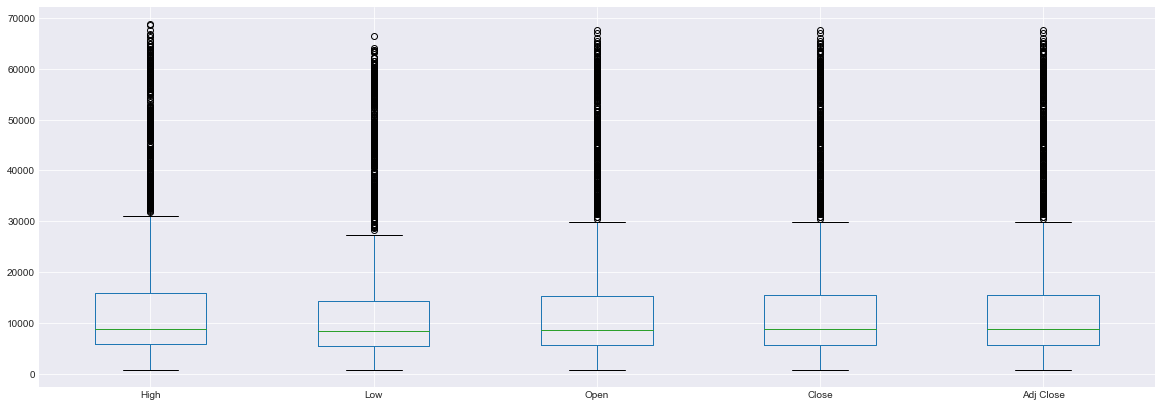

In [7]:
import seaborn as sns
plt.figure(figsize=(20,7))
boxplot = data.boxplot(column=['High', 'Low', 'Open','Close','Adj Close'])

<AxesSubplot:xlabel='Volume'>

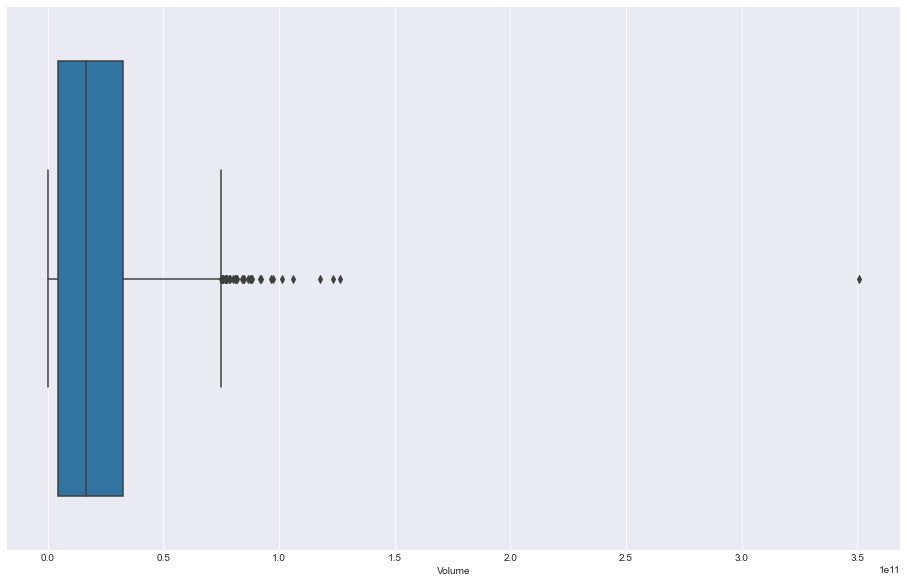

In [8]:
d = pd.DataFrame(data)
import seaborn as sns
sns.boxplot(x=d['Volume'])

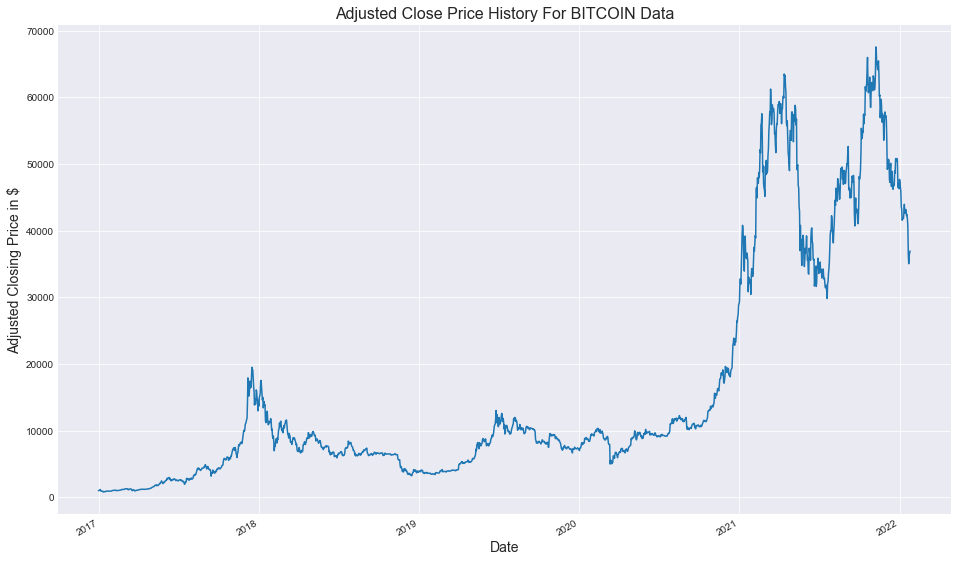

In [9]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Adj Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Adjusted Close Price History For BITCOIN Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Adjusted Closing Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()